In [57]:
from fastai.vision.all import *

In [58]:
# I'm going to download and decompress my dataset, which cosists of dogs and cats images.


In [59]:
# I'm going to label my images as dogs or cats. In this dataset, pictures of cats are given a filname that starts with a capital letter.
def is_cat(x): return x[0].isupper()

In [60]:
path = untar_data(URLs.PETS)/'images'
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

In [61]:
# dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, seed=42, label_func=is_cat, item_tfms=Resize(192))

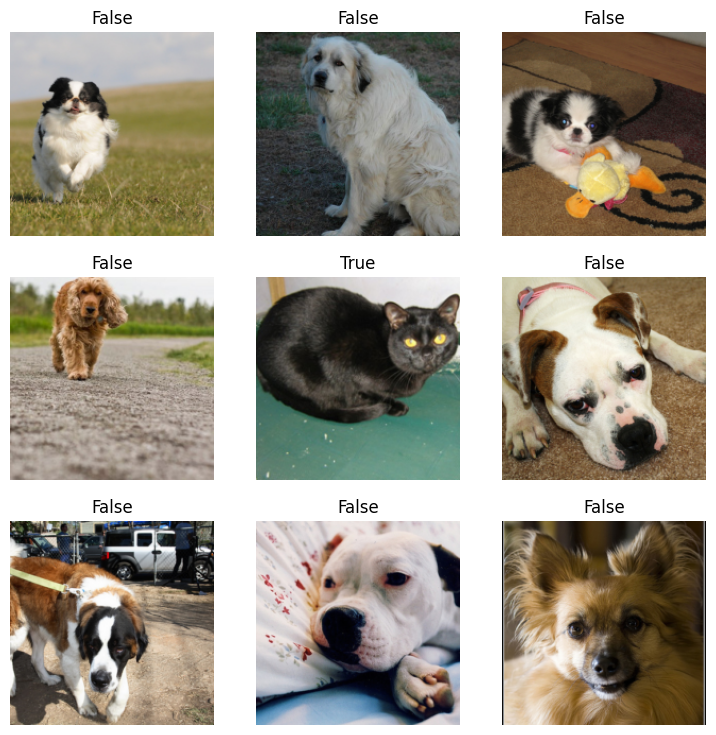

In [62]:
dls.show_batch()

In [63]:
# Now, I can train my model using a resnet18 to keep it small and fast.
# fp_16 is deprecated since fastai v1
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.179904,0.046802,0.016238,03:16


epoch,train_loss,valid_loss,error_rate,time
0,0.085837,0.036303,0.009472,04:17
1,0.049646,0.024155,0.007442,04:18
2,0.021722,0.018058,0.007442,04:22


In [64]:
# export my model
learn.export('model.pkl')